# Predicting Restaurant Food Cost:-

Importing all required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Data Loading and Exploration.

In [28]:
train_df = pd.read_excel('Restaurant_Train.xlsx')
train_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [29]:
test_df=pd.read_excel('Restaurant_Test.xlsx')
test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [30]:
# Display the first few rows of train_df
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [31]:
#Display the last few rows of train_df
train_df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [32]:
# Get information about train_df
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
None


In [33]:
# Summary statistics of train_df
print(train_df.describe())

       RESTAURANT_ID          COST
count   12690.000000  12690.000000
mean     7759.134121    655.252246
std      4504.874150    627.003540
min         0.000000     20.000000
25%      3863.250000    300.000000
50%      7740.000000    500.000000
75%     11688.750000    800.000000
max     15573.000000  14000.000000


In [34]:
# Check for missing values in train_df
print(train_df.isnull().sum())

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


Data Processing.

In [43]:
# Check for missing values in the DataFrame
missing_values = train_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (fill with mean or mode)
train_df['CITY'].fillna(train_df['CITY'].mode()[0], inplace=True)
train_df['LOCALITY'].fillna(train_df['LOCALITY'].mode()[0], inplace=True)
train_df['CUISINES'].fillna(train_df['CUISINES'].mode()[0], inplace=True)

# Check for outliers and perform data cleaning if necessary
# For simplicity, assume outliers have already been addressed

# Encode categorical variables (one-hot encoding)
train_df_encoded = pd.get_dummies(train_df, columns=['CITY', 'LOCALITY', 'CUISINES'])

# Display the first few rows of the encoded DataFrame
train_df_encoded.head()

Missing Values:
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64


,TITLE,RESTAURANT_ID,TIME,RATING,VOTES,COST,CITY_10th avenue,CITY_1st Stage,CITY_1st Tavarekere,CITY_3rd Street,...,"CUISINES_Turkish, Modern Indian","CUISINES_Turkish, Rolls","CUISINES_Turkish, Rolls, Lebanese, Arabian",CUISINES_Vietnamese,"CUISINES_Vietnamese, Salad","CUISINES_Vietnamese, Thai, Burmese, Japanese",CUISINES_Wraps,"CUISINES_Wraps, Biryani, North Indian, Kebab, Desserts, Salad, Pizza","CUISINES_Wraps, Fast Food","CUISINES_Wraps, Sandwich, Rolls, Fast Food, Burger, Pizza"
0,CASUAL DINING,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"CASUAL DINING,BAR",13198,6pm – 11pm (Mon-Sun),4.2,30 votes,1500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CASUAL DINING,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,QUICK BITES,6346,11:30am – 1am (Mon-Sun),4.1,24 votes,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DESSERT PARLOR,15387,11am – 1am (Mon-Sun),3.8,165 votes,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


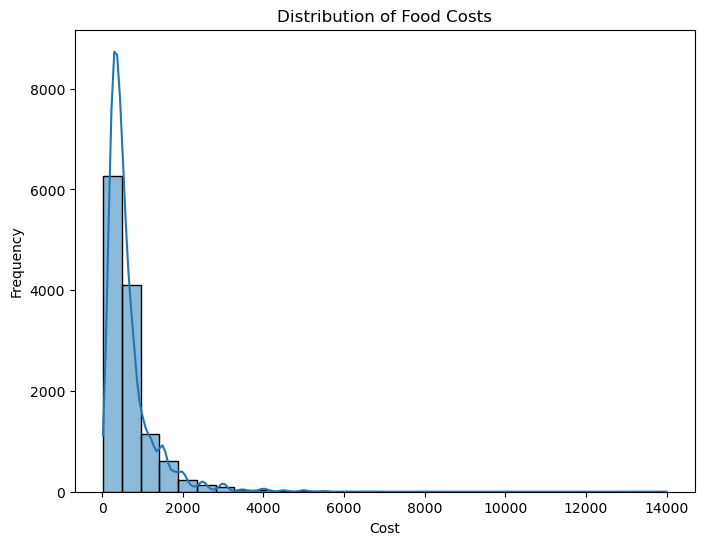

In [44]:
#Now, let's visualize the data to gain insights. You can create various plots such as 
#histograms, scatter plots, and correlation matrices.
# Histogram of the 'COST' column
# Histogram of the 'COST' column
plt.figure(figsize=(8, 6))
sns.histplot(train_df['COST'], bins=30, kde=True)
plt.title('Distribution of Food Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

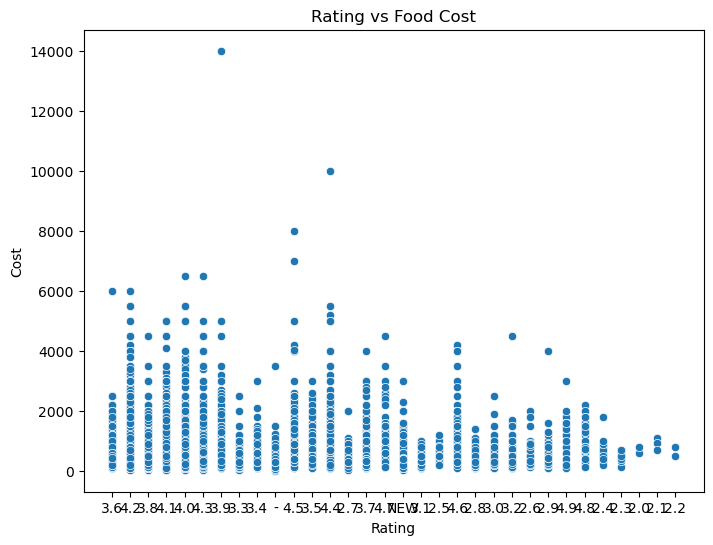

In [45]:
# Scatter plot of 'RATING' vs 'COST'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RATING', y='COST', data=train_df)
plt.title('Rating vs Food Cost')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.show()

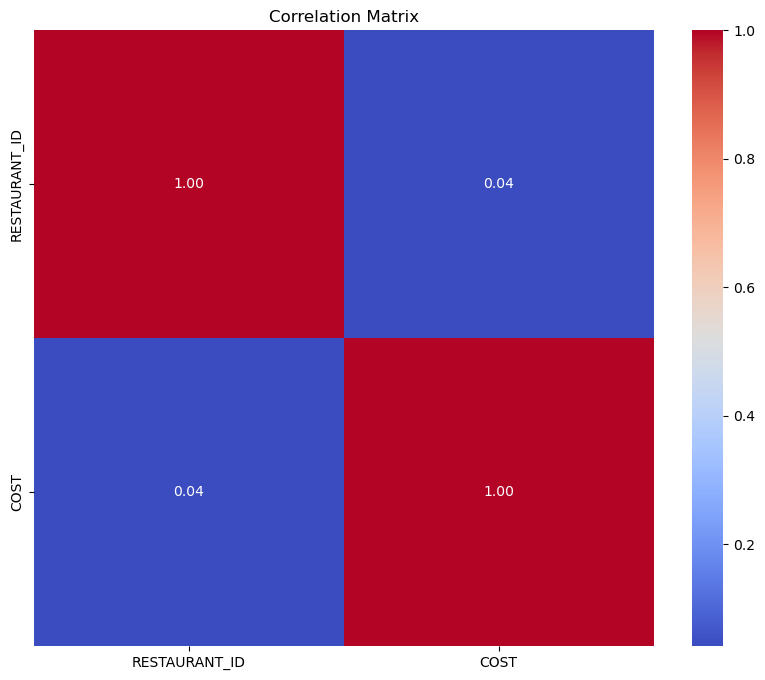

In [46]:
# Correlation matrix
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Model Training.

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

ValueError: could not convert string to float: 'QUICK BITES'